In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\\Users\\DELL\\DATA SCIENCE\\loandata.xlsx")

In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [63]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## start on getting  probabaility

In [65]:
df1=df.dropna(how="any",axis=0)

In [66]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [67]:
len(df1)

480

In [68]:
df1.pivot_table(values="ApplicantIncome",index="Loan_Status",columns="Gender",aggfunc="count")

Gender,Female,Male
Loan_Status,,
N,32,116
Y,54,278


In [69]:
df1.pivot_table(values="ApplicantIncome",index="Loan_Status",columns="Gender",aggfunc="mean")

Gender,Female,Male
Loan_Status,,
N,4299.343750,6124.905172
Y,5365.185185,5169.219424


In [70]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
df1.pivot_table(values="ApplicantIncome",index="Loan_Status",columns="Gender",aggfunc="median")

Gender,Female,Male
Loan_Status,,
N,4016.5,3837.5
Y,3714.5,3893.5


In [73]:
df1.pivot_table(values="Credit_History",index="Loan_Status",columns="Gender",aggfunc="median")

Gender,Female,Male
Loan_Status,,
N,1.0,1.0
Y,1.0,1.0


In [91]:
df1.pivot_table(values="Credit_History",index="Loan_Status",columns=["Gender"],aggfunc="mean")

Gender,Female,Male
Loan_Status,,
N,0.593750,0.568966
Y,0.981481,0.978417


In [92]:
df1.pivot_table(values="LoanAmount",index="Loan_Status",columns=["Gender","Property_Area","Loan_Amount_Term"],aggfunc="mean")

Gender            Female                                                   \
Property_Area      Rural        Semiurban                                   
Loan_Amount_Term   360.0  480.0     36.0   84.0   180.0 300.0       360.0   
Loan_Status                                                                 
N                 117.75  151.0     155.0    NaN    NaN  99.0  121.545455   
Y                 123.90  113.0       NaN  105.0  140.0   NaN  149.321429   

Gender                                Male  ...                        \
Property_Area                 Urban  Rural  ... Semiurban               
Loan_Amount_Term  480.0       360.0  84.0   ...     300.0       360.0   
Loan_Status                                 ...                         
N                   NaN  124.100000  172.0  ...     166.0  190.095238   
Y                 113.0   97.166667    NaN  ...     145.0  140.203883   

Gender                                                              \
Property_Area                 Urban                                  
Loan_Amount_Term       480.0  60.0   84.0  120.0       180.0 240.0   
Loan_Status                                                          
N                 115.333333    NaN    NaN   NaN  110.285714   NaN   
Y                 108.500000  140.0  108.0  17.0  114.333333  50.0   

Gender                              
Property_Area                       
Loan_Amount_Term       360.0 480.0  
Loan_Status                         
N                 150.483871  96.5  
Y                 142.055556   NaN  

[2 rows x 27 columns]

In [101]:
df1.pivot_table(values="LoanAmount",index="Loan_Status",columns=["Gender","Property_Area","Loan_Amount_Term"],aggfunc="mean")

Gender            Female                                                   \
Property_Area      Rural        Semiurban                                   
Loan_Amount_Term   360.0  480.0     36.0   84.0   180.0 300.0       360.0   
Loan_Status                                                                 
N                 117.75  151.0     155.0    NaN    NaN  99.0  121.545455   
Y                 123.90  113.0       NaN  105.0  140.0   NaN  149.321429   

Gender                                Male  ...                        \
Property_Area                 Urban  Rural  ... Semiurban               
Loan_Amount_Term  480.0       360.0  84.0   ...     300.0       360.0   
Loan_Status                                 ...                         
N                   NaN  124.100000  172.0  ...     166.0  190.095238   
Y                 113.0   97.166667    NaN  ...     145.0  140.203883   

Gender                                                              \
Property_Area                 Urban                                  
Loan_Amount_Term       480.0  60.0   84.0  120.0       180.0 240.0   
Loan_Status                                                          
N                 115.333333    NaN    NaN   NaN  110.285714   NaN   
Y                 108.500000  140.0  108.0  17.0  114.333333  50.0   

Gender                              
Property_Area                       
Loan_Amount_Term       360.0 480.0  
Loan_Status                         
N                 150.483871  96.5  
Y                 142.055556   NaN  

[2 rows x 27 columns]

In [102]:
df1.pivot_table(values="LoanAmount",index="Loan_Status",columns=["Property_Area","Credit_History"],aggfunc="count")

Property_Area  Rural     Semiurban      Urban    
Credit_History   0.0 1.0       0.0  1.0   0.0 1.0
Loan_Status                                      
N                 20  34        20   22    23  29
Y                  2  83         4  145     1  97

In [103]:
df1.pivot_table(values="LoanAmount",index="Loan_Status",columns=["Property_Area"],aggfunc="count")

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,54,42,52
Y,85,149,98


In [104]:
df1.pivot_table(values="LoanAmount",index="Loan_Status",columns=["Education","Married"],aggfunc="count")

Education   Graduate      Not Graduate    
Married           No  Yes           No Yes
Loan_Status                               
N                 52   60           12  24
Y                 83  188           22  39

In [133]:
df2=df1[df1["Loan_Status"]=='Y']

In [134]:
len(df2)

332

In [135]:
df3=df1[df1["Loan_Status"]=='N']

In [136]:
len(df3)

148

In [149]:
len(df2)/480*100

69.16666666666667

In [138]:
325/len(df2)*100

97.89156626506023

In [130]:
C.pivot_table(values="Gender",columns=["Credit_History"],aggfunc="count")

Credit_History,0.0,1.0
Gender,7,325


In [140]:
df3.pivot_table(values="Gender",columns=["Credit_History"],aggfunc="count")

Credit_History,0.0,1.0
Gender,63,85


In [143]:
df2.groupby(by=["Education"])["Education"].count()/len(df2)*100

Education
Graduate        81.626506
Not Graduate    18.373494
Name: Education, dtype: float64

In [150]:
df2.groupby(by=["Education"])["Education"].count()

Education
Graduate        271
Not Graduate     61
Name: Education, dtype: int64

In [148]:
df2.groupby(by=["Self_Employed"])["Self_Employed"].count()

Self_Employed
No     289
Yes     43
Name: Self_Employed, dtype: int64

In [153]:
df2.groupby(by=["Education","Credit_History"]).count()/len(df2)*100

Loan_ID     Gender    Married  Dependents  \
Education    Credit_History                                                
Graduate     0.0              1.807229   1.807229   1.807229    1.807229   
             1.0             79.819277  79.819277  79.819277   79.819277   
Not Graduate 0.0              0.301205   0.301205   0.301205    0.301205   
             1.0             18.072289  18.072289  18.072289   18.072289   

                             Self_Employed  ApplicantIncome  \
Education    Credit_History                                   
Graduate     0.0                  1.807229         1.807229   
             1.0                 79.819277        79.819277   
Not Graduate 0.0                  0.301205         0.301205   
             1.0                 18.072289        18.072289   

                             CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Education    Credit_History                                                    
Graduate     0.0                      1.807229    1.807229          1.807229   
             1.0                     79.819277   79.819277         79.819277   
Not Graduate 0.0                      0.301205    0.301205          0.301205   
             1.0                     18.072289   18.072289         18.072289   

                             Property_Area  Loan_Status  
Education    Credit_History                              
Graduate     0.0                  1.807229     1.807229  
             1.0                 79.819277    79.819277  
Not Graduate 0.0                  0.301205     0.301205  
             1.0                 18.072289    18.072289

In [154]:
df3.groupby(by=["Self_Employed"])["Self_Employed"].count()

Self_Employed
No     125
Yes     23
Name: Self_Employed, dtype: int64

In [155]:
df3.groupby(by=["Education"])["Education"].count()

Education
Graduate        112
Not Graduate     36
Name: Education, dtype: int64

In [156]:
df3.groupby(by=["Credit_History"])["Credit_History"].count()

Credit_History
0.0    63
1.0    85
Name: Credit_History, dtype: int64

In [159]:
df2.groupby(by=["Education","Self_Employed"]).count()/len(df3)*100

Loan_ID      Gender     Married  Dependents  \
Education    Self_Employed                                                   
Graduate     No             159.459459  159.459459  159.459459  159.459459   
             Yes             23.648649   23.648649   23.648649   23.648649   
Not Graduate No              35.810811   35.810811   35.810811   35.810811   
             Yes              5.405405    5.405405    5.405405    5.405405   

                            ApplicantIncome  CoapplicantIncome  LoanAmount  \
Education    Self_Employed                                                   
Graduate     No                  159.459459         159.459459  159.459459   
             Yes                  23.648649          23.648649   23.648649   
Not Graduate No                   35.810811          35.810811   35.810811   
             Yes                   5.405405           5.405405    5.405405   

                            Loan_Amount_Term  Credit_History  Property_Area  \
Education    Self_Employed                                                    
Graduate     No                   159.459459      159.459459     159.459459   
             Yes                   23.648649       23.648649      23.648649   
Not Graduate No                    35.810811       35.810811      35.810811   
             Yes                    5.405405        5.405405       5.405405   

                            Loan_Status  
Education    Self_Employed               
Graduate     No              159.459459  
             Yes              23.648649  
Not Graduate No               35.810811  
             Yes               5.405405

In [160]:
df2.groupby(by=["Self_Employed"]).count()/len(df3)*100

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,,
No,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270,195.270270
Yes,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054,29.054054


In [162]:
# df2.groupby(by=["Education"]).count()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Education,,,,,,,,,,,,
Graduate,271,271,271,271,271,271,271,271,271,271,271,271
Not Graduate,61,61,61,61,61,61,61,61,61,61,61,61


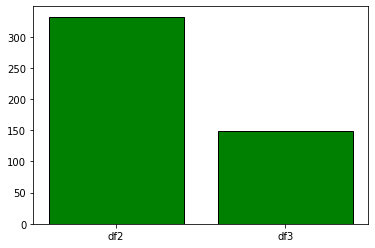

In [173]:
df4=["df2","df3"]
loan_status=[332,148]

plt.bar(df4,loan_status,color="green",edgecolor='black')
plt.show();

In [169]:
len(df2)

332

In [167]:
len(df3)

148

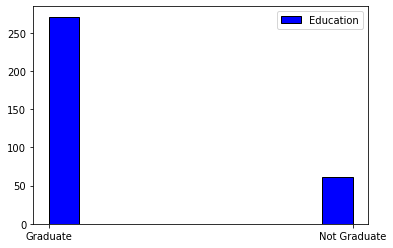

In [177]:
plt.hist(df2["Education"],edgecolor="black",label="Education",color="blue")
plt.legend()

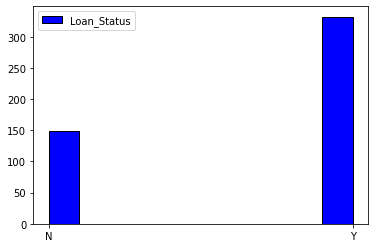

In [181]:
plt.hist(df1["Loan_Status"],edgecolor="black",label="Loan_Status",color="blue")
plt.legend()

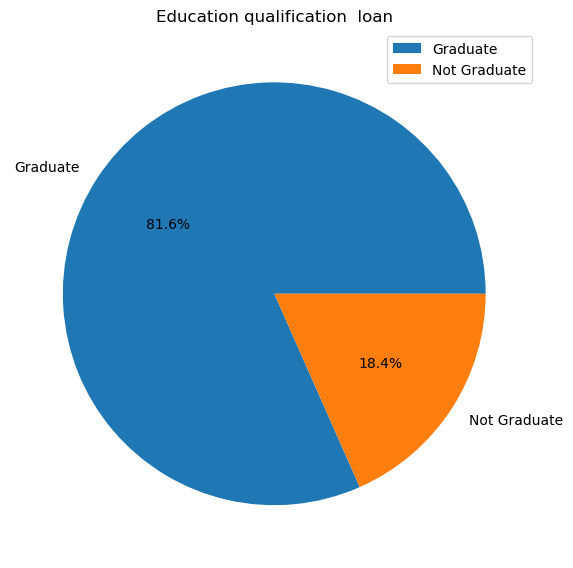

In [195]:
df4=["Graduate","Not Graduate"]
loan_Status=[271,61]
plt.figure(figsize=(7,7),dpi=100)

plt.pie(loan_Status,labels=df4,autopct='%.1f%%')

plt.title("Education qualification  loan")
plt.legend();